In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
# lets sort columns by their Datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

#### Observations:

##### - This titanic dataset contains 891 rows and 12 columns.
##### - Here our objective is to predict survival using classification algorithm for that here out target variable is "Survived".
##### - We have 5 features with object datatypes and res are with numerical features.

### Data Integrity Check

##### Dataset can contain whitespaces, missing value, duplicate entries. lets invstigate integrity of data before proceeding for further analysis.

In [5]:
df.duplicated().sum()

0

##### Checking for presense of white spaces ,"?","null"

In [6]:
df.isin([" ","?","-","null","NA"]).sum().any()

False

##### Missing values check

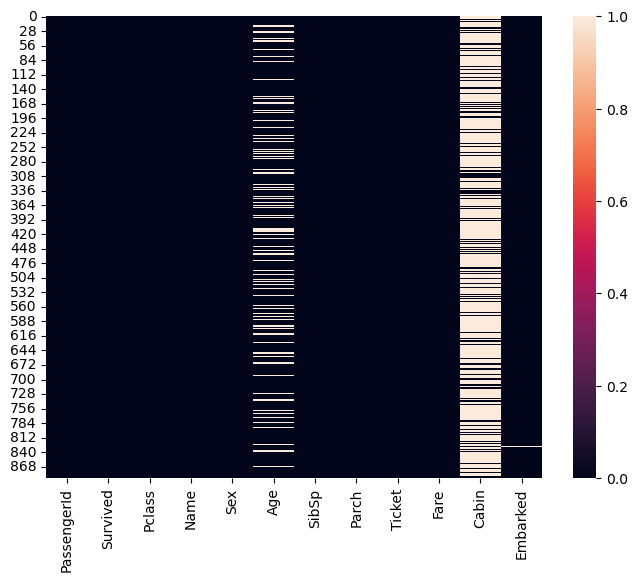

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1,keys = ["Missing values","% Missing values"]))

             Missing values  % Missing values
Cabin                   687         77.104377
Age                     177         19.865320
Embarked                  2          0.224467
PassengerId               0          0.000000
Survived                  0          0.000000
Pclass                    0          0.000000
Name                      0          0.000000
Sex                       0          0.000000
SibSp                     0          0.000000
Parch                     0          0.000000
Ticket                    0          0.000000
Fare                      0          0.000000


### Observations:

##### 1) Dataset do not contain any duplicate values, whitespaces,"?","-".
##### 2) Feature "Age","Embarked" and "Cabin" have null values.
##### 3) 19.86% of "Age" is null values,0.22% of "Embarked" is null values, while 77.10% "Cabin" data is null values.
##### 4) Dropping"Cabin" since 77.10% of its value is missing and therefore it cannot contribute to building a good model a good model for redictiog the target a=variable values.


## Statistical Summary

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##### "Survived" - Target column has 2 categories
##### "sex"      - Feature column has 2 categories
##### "Pclass"   - Feature column has 2 categories
##### "Embarked" - Feature column has 3 categories
##### "Sibsp"    - Feature column has 7 discrete values
##### "Parch    - Feature column has 7 discrete values

##### "Cabin" is unnecessary feature with missing values so we can ddrop it

In [12]:
df.drop(columns=["Cabin"],inplace=True)

### How many survived?

In [13]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

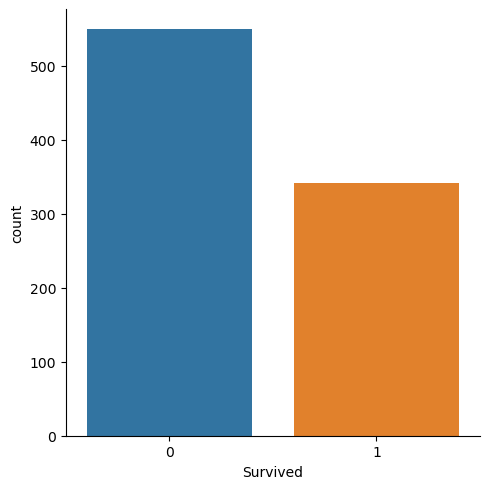

In [14]:
sns.catplot(x="Survived",kind="count",data=df)
plt.show()

##### Out of 891 passengers in the titanic, only 342 survived

### lets investigate gender wise survival rate of passengers

In [15]:
df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

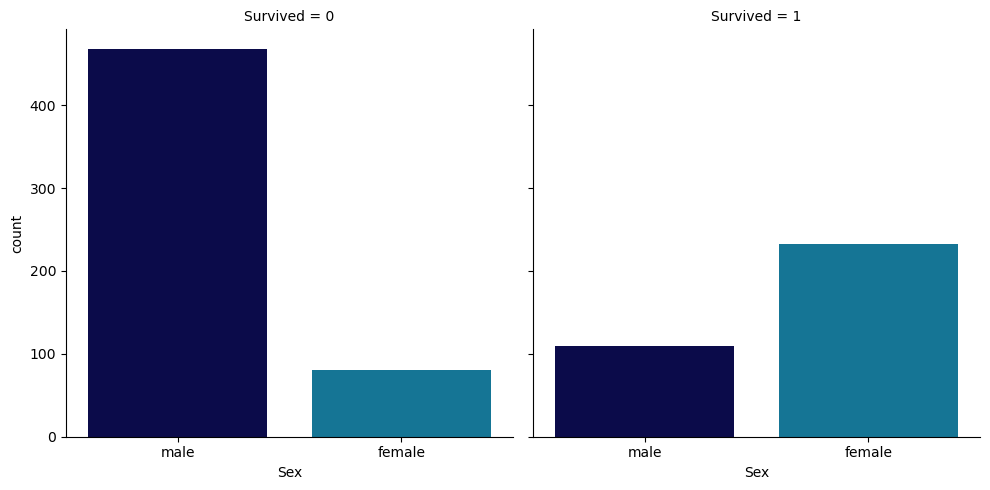

In [16]:

sns.catplot(x="Sex",col="Survived",data=df,kind="count",palette="ocean")
plt.show()

##### the number of men on ship is lot more than the number of women. Still the numver of women saved is almost twice the number of males saved . The survival rates of a woman were more as compared to men.

### Exploration of Passengers Class Vs Survival


In [17]:
df.groupby(["Pclass","Survived"])["Survived"].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

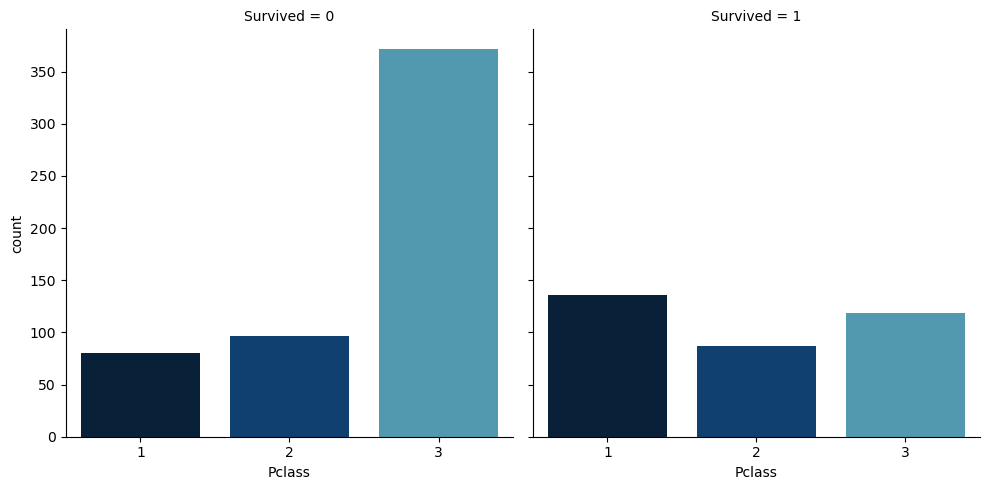

In [18]:
sns.catplot(x="Pclass",col="Survived",data=df,kind="count",palette="ocean")
plt.show()

##### We can clearly see that the passngers of Pclass 1 were given a high pririty while rescue. Even though the number of passengers in Pclass 3 were a lot more, still the number of survival from Pclass is very low.

### Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [19]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

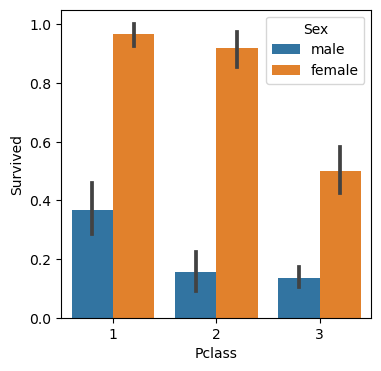

In [20]:
plt.figure(figsize=(4,4))
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=df,)
plt.show()

##### 1)Looking at the CrossTab and the Factorplot, we can easily infer that survival for Women from Pclass 1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.
##### 2) It is evident (from CrossTab and the Factorplot) that irrespective of pclass, women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.


### Handling missing values in feature Age

##### As we had seen earlier the AGe feature has 177 null values. to replace these NaN alues we can assign them the mean age of the dataset

##### we cannot SImply Assign mean age for suppose of 29 yar to 4 year old kid. so we must find another way to impute mean age values

##### Looking upon the Name feature, we can see that the names have as Prefix like Mr or Mrs. THus  we can asign the mean values of Mr,Mrs etc. to the respective groups

In [21]:
df["Initial"]=0
for i in df:
    df["Initial"]=df.Name.str.extract("([A-Za-z]+)\.") # extracted using regex

In [22]:
pd.crosstab(df.Initial,df.Sex)

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [24]:
df.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN values in Ages

In [25]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)

In [26]:
df.loc[((df.Age.isnull())&(df.Initial)=='Mr'), 'Age']=32.73
df.loc[((df.Age.isnull())&(df.Initial)=='Mrs'), 'Age']=35.98
df.loc[((df.Age.isnull())&(df.Initial)=='Master'), 'Age']=4.57
df.loc[((df.Age.isnull())&(df.Initial)=='Miss'), 'Age']=21.86
df.loc[((df.Age.isnull())&(df.Initial)=='Other'), 'Age']=45.889

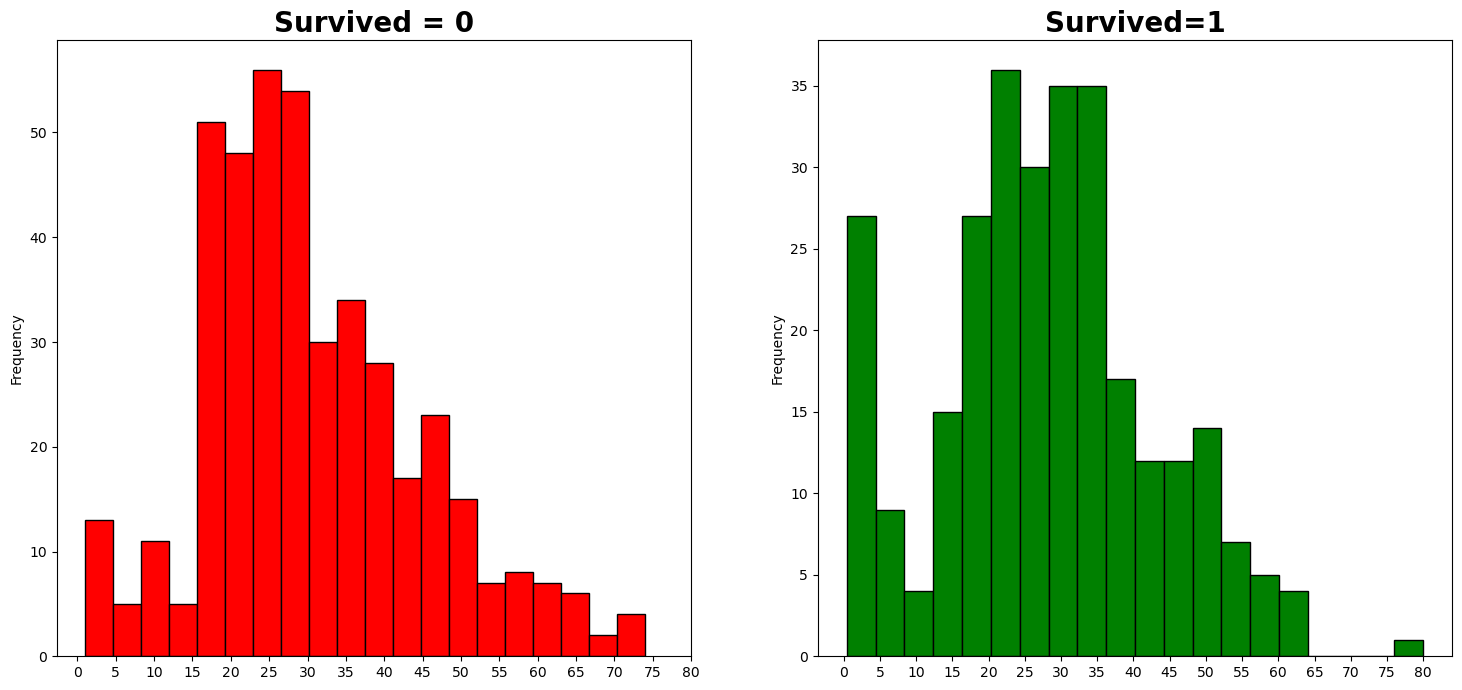

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0',fontsize= 20, fontweight='bold')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1',fontsize= 20, fontweight='bold')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observation:
##### 1)The Toddlers(age<5) were saved in large numbers. Possibliy, Women and Child first policy employs while rescue operation employed.
##### 2)The oldest Passenger was saved (80 years).
##### 3)Maximum number of deaths were in age group of 30-40.

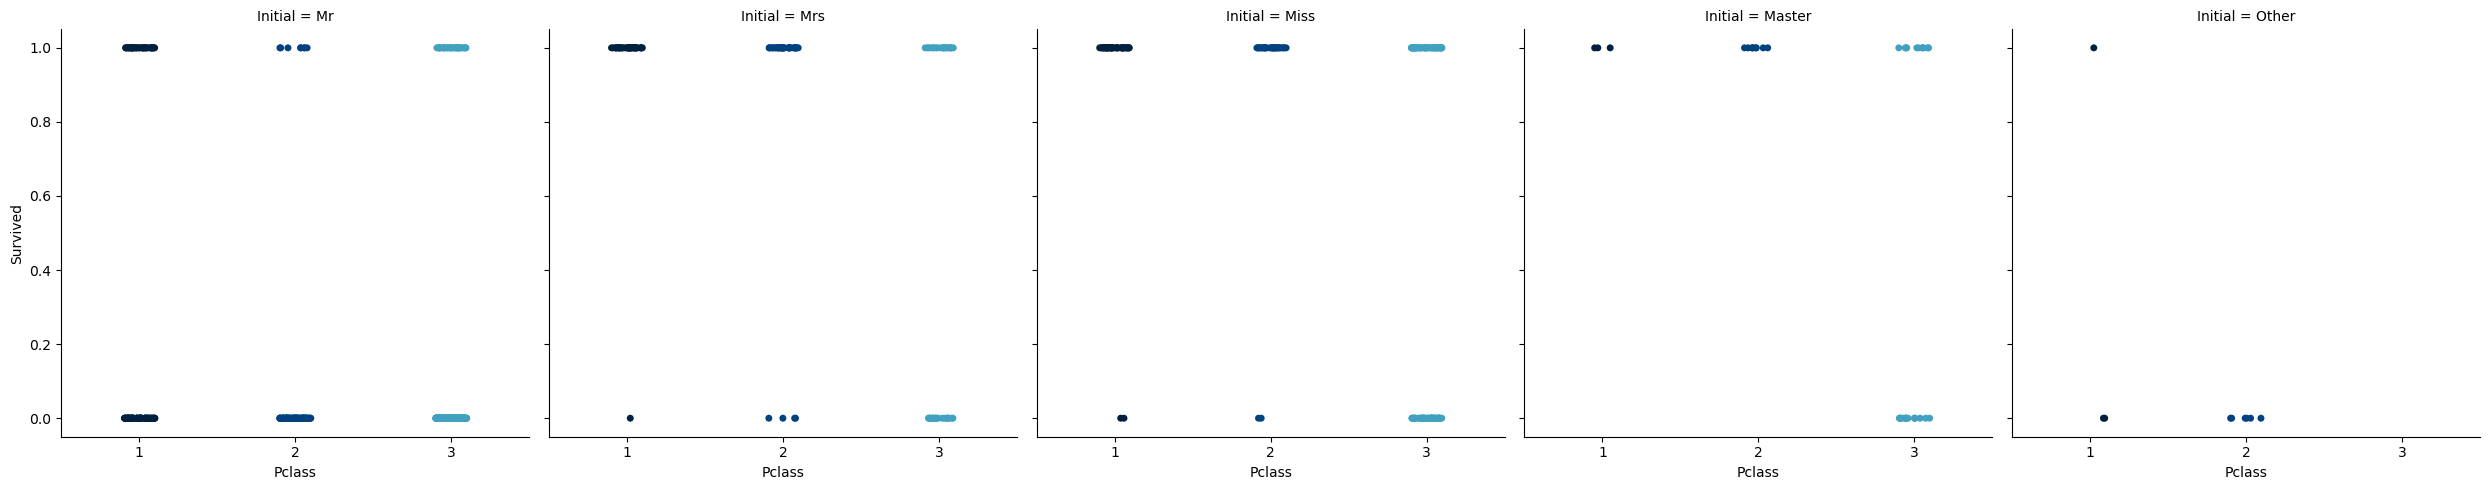

In [28]:
sns.catplot(x="Pclass",y="Survived",col="Initial",data=df,palette="ocean")
plt.show()

##### The women and child first policy thus holds true irrespective of the class.

### Analysis Embarked vs Survival

In [29]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

### Chances for Survival by Port of Embarkation

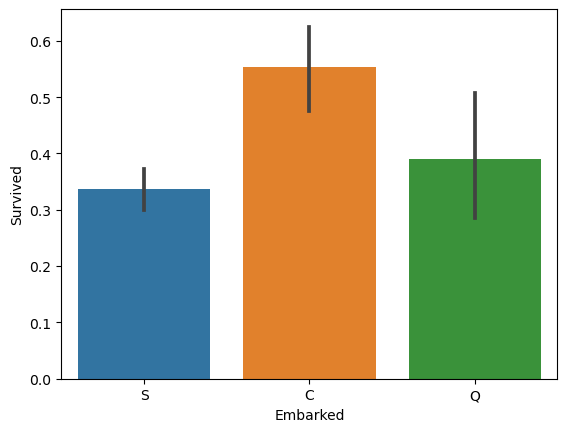

In [30]:
sns.barplot(x="Embarked",y="Survived",data=df)
plt.show()

##### The chances for survival for port C is highest around 0.55 while it is lowest for S around 3.3

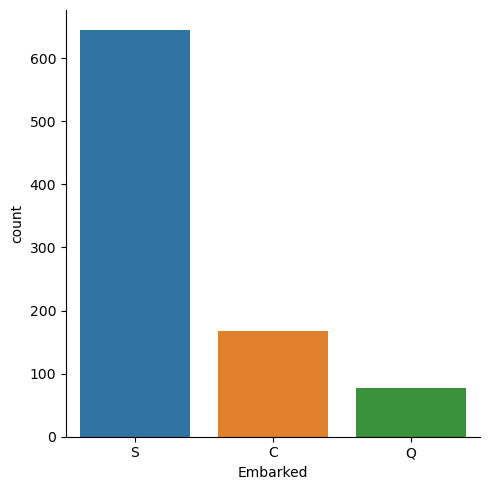

In [31]:
sns.catplot(x='Embarked' ,data=df,kind="count")
plt.show()

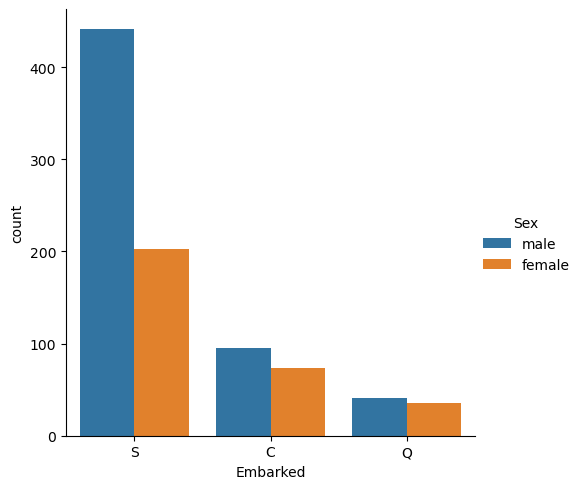

In [32]:
sns.catplot(x='Embarked',hue="Sex" ,data=df,kind="count")
plt.show()

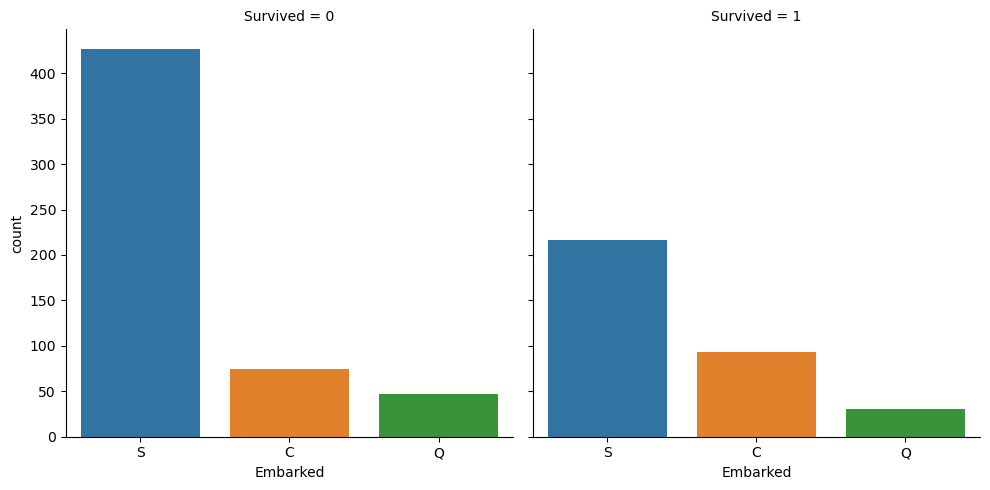

In [33]:
sns.catplot(x='Embarked',col="Survived" ,data=df,kind="count")
plt.show()

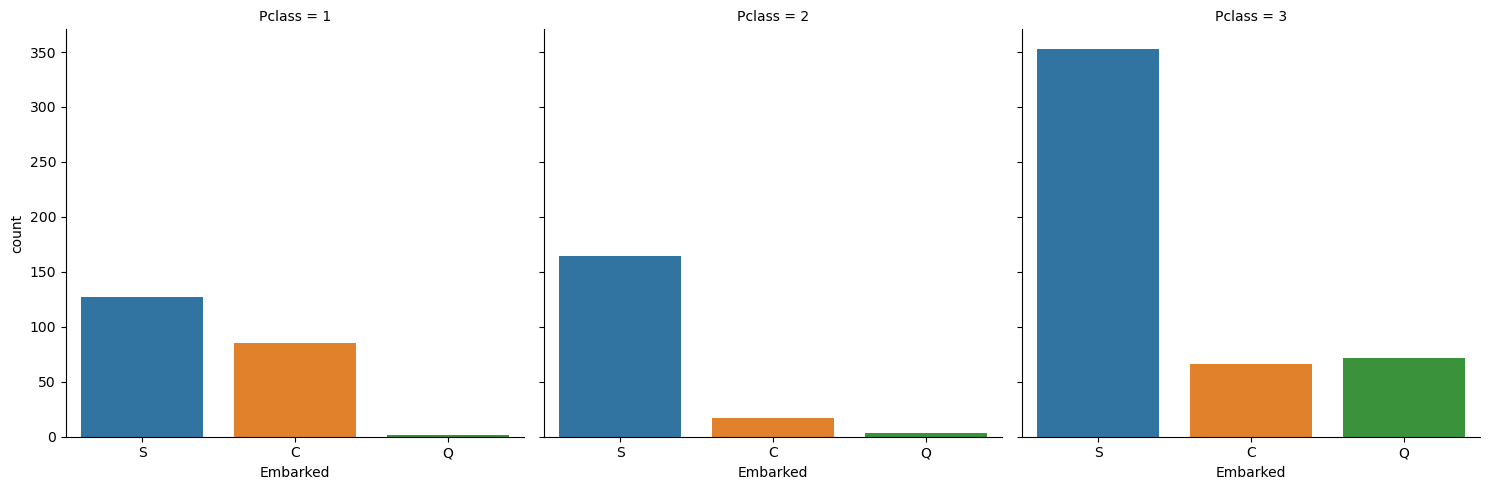

In [34]:
sns.catplot(x='Embarked',col="Pclass" ,data=df,kind="count")
plt.show()

### Observations:

##### 1) Maximum passengers boarded from S. Majority of them being from Pclass 3.
##### 2) The Passengers from C look to be lucky as as good proportion of them survived. The reason for this may be the rescue of all the Pclass 1 and Pclass 2 Passengers.

### Filling Embarked NaN values
as we saw that maximum passengers boarded from port S, we will replace NaN with S.

In [35]:
df["Embarked"].fillna("S",inplace=True)
df.Embarked.isnull().any()

False

### SibSip vs Survived

In [36]:
pd.crosstab([df.SibSp],[df.Survived],margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


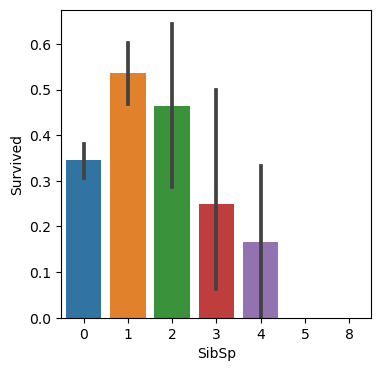

In [37]:
plt.figure(figsize=(4,4))
sns.barplot(x='SibSp',y='Survived',data=df)
plt.show()

In [38]:
pd.crosstab([df.SibSp],[df.Pclass],margins=True)

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


### Observations:

##### 1)The barplot shows that if as passenger is alone onboard with no siblings, Passenger have 34.5% survival rate. The graph roughly decreases if the number of sibilings increase.
##### 2)Surprisingly the survival for families with 5-8 members is 0% . The reason may be Pclass ?
##### 3)The crosstab shows that person with SibSp>3 were all in Pclass 3. It is imminent that all the large families in Pclass 3  died.

## Parch vs Survived

In [39]:
pd.crosstab([df.Parch],[df.Pclass],margins=True)

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


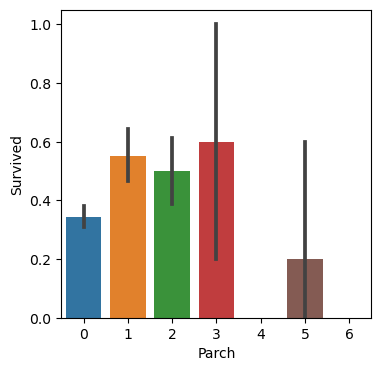

In [40]:
plt.figure(figsize=(4,4))
sns.barplot(x='Parch',y='Survived',data=df)
plt.show()

### Observations:

##### 1)Passengers with their parents onboard have greater chance of survival. it however reduces as the number goes up.
##### 2)The chances of survival is good for somebody who has 1-3 parents on the ship.

## Fare vs Survived

In [41]:
print('Highest Fare was :',df['Fare'].max())
print('Highest Fare was :',df['Fare'].min())
print('Average Fare was :',df['Fare'].mean())

Highest Fare was : 512.3292
Highest Fare was : 0.0
Average Fare was : 32.204207968574636


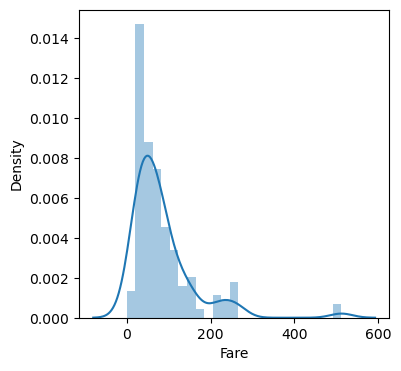

In [42]:
plt.figure(figsize=(4,4))
sns.distplot(df[df["Pclass"]==1].Fare)
plt.show()

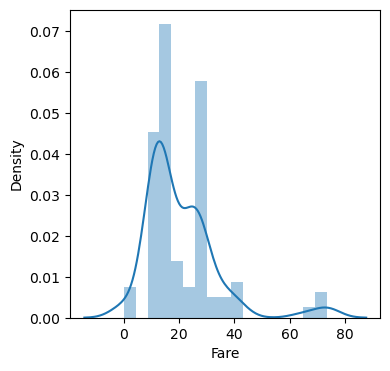

In [43]:
plt.figure(figsize=(4,4))
sns.distplot(df[df["Pclass"]==2].Fare)
plt.show()

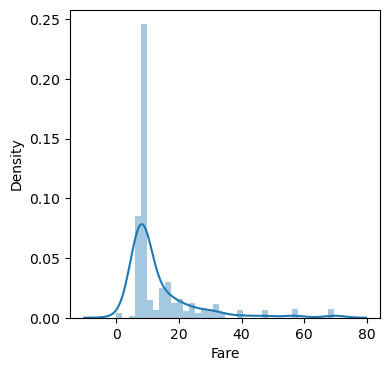

In [44]:
plt.figure(figsize=(4,4))
sns.distplot(df[df["Pclass"]==3].Fare)
plt.show()

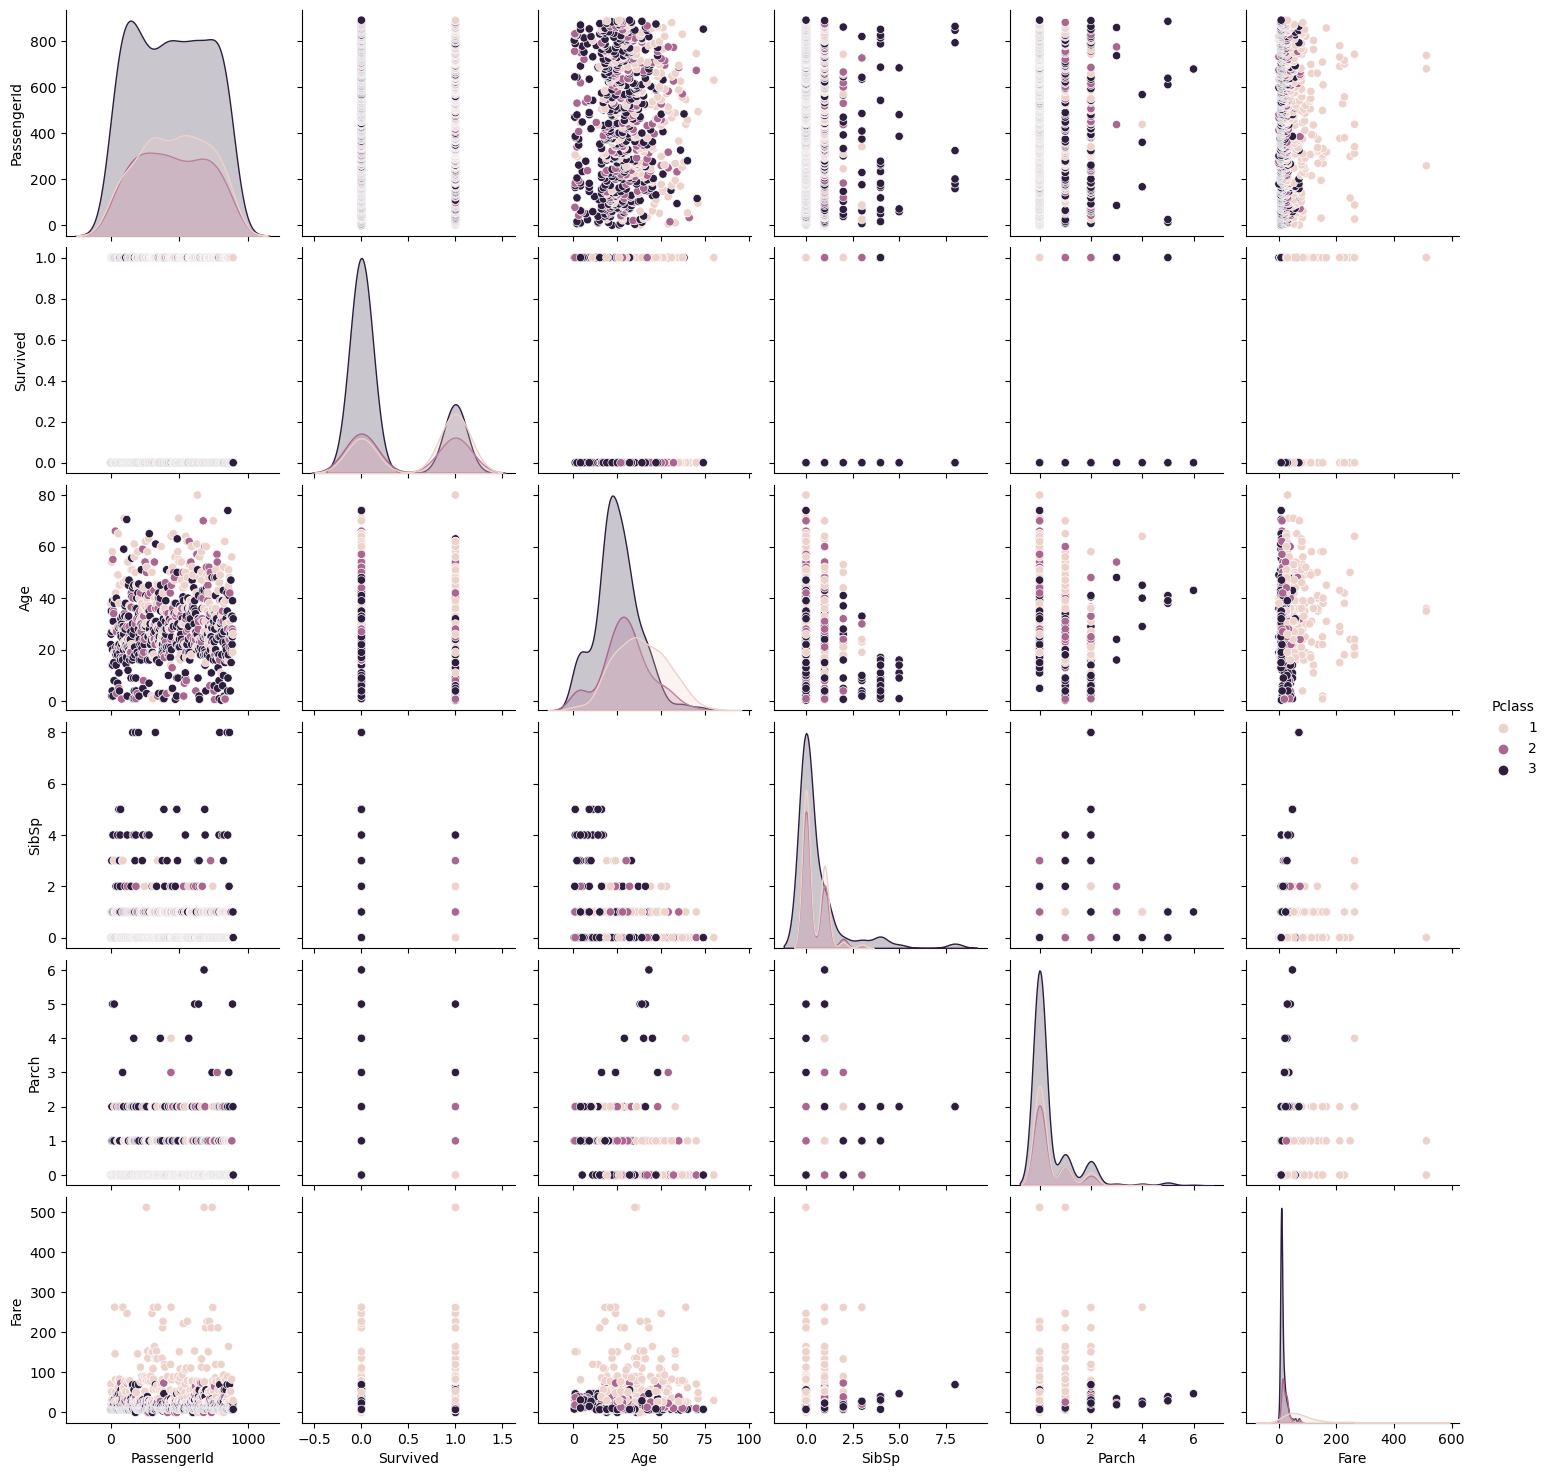

In [45]:
sns.pairplot(data=df,hue="Pclass")
plt.show()

## Correlation

In [46]:
corr=df.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


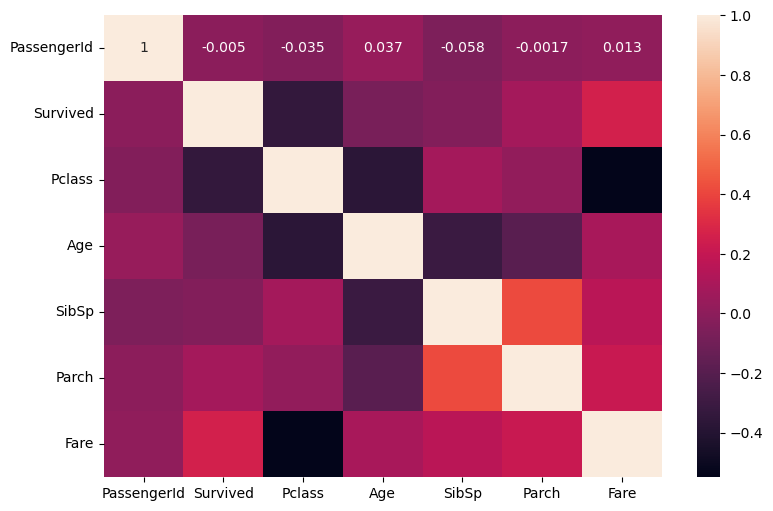

In [47]:
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True)
plt.show()

### Correlation with Target Varibles Survived

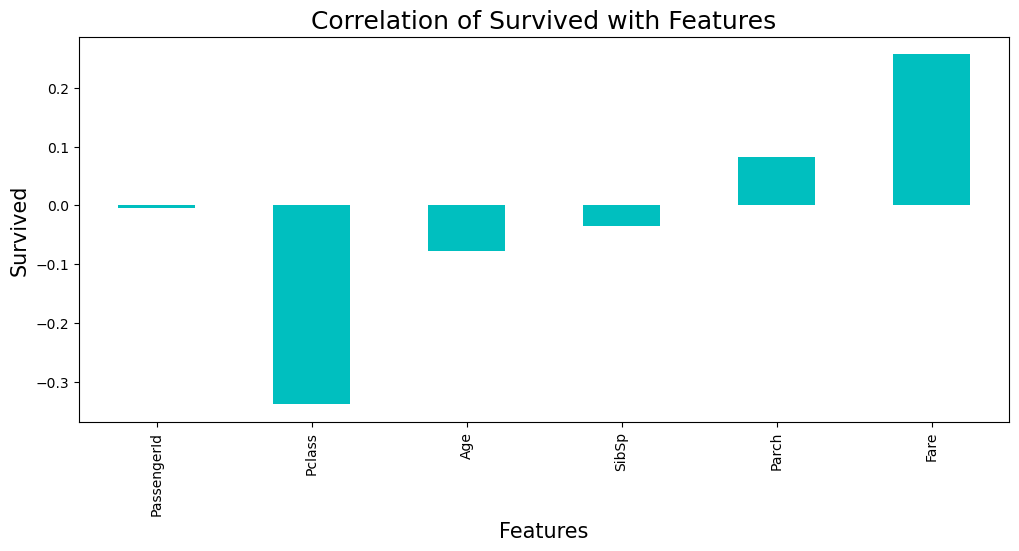

In [48]:
plt.figure(figsize=(12,5))
corr["Survived"].drop(["Survived"]).plot(kind="bar",color="c")
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

## Outliers Detections and Removal

In [49]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Embarked', 'Initial']}

In [50]:
# Droping unnecessary column for further investigation
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

In [51]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked', 'Initial']}

In [52]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

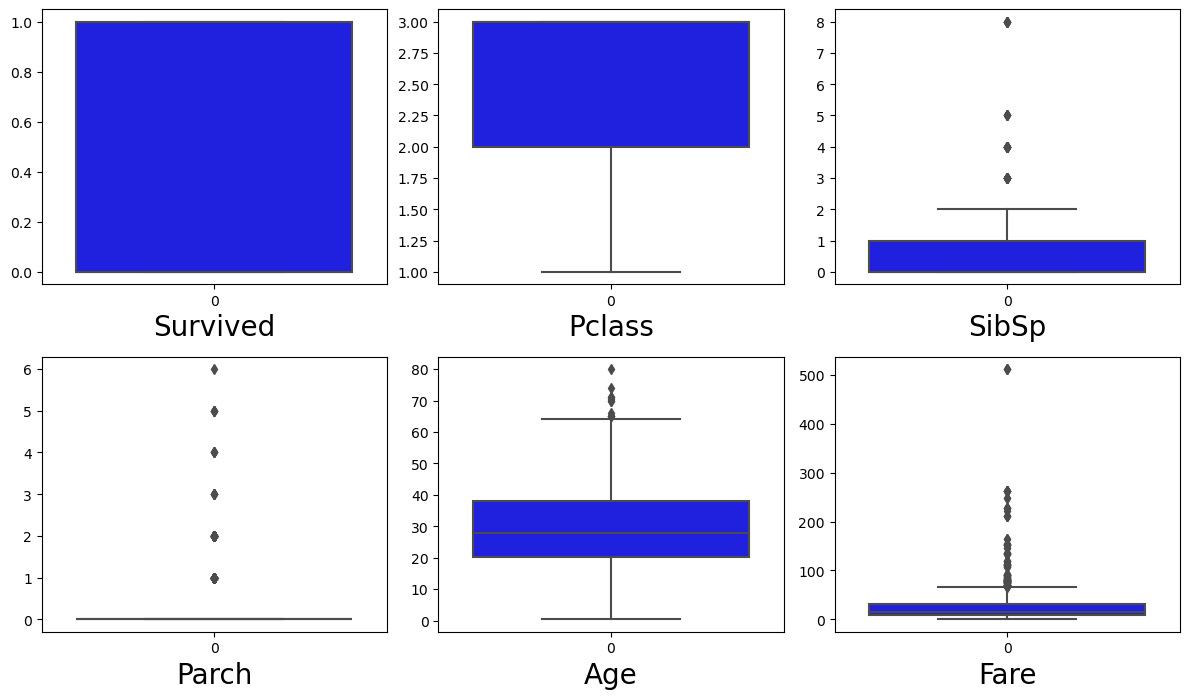

In [53]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### As we can see that the continuous features like age and fare cotains outliers.

In [54]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [56]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])

In [57]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [58]:
df.shape

(881, 9)

In [59]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

## Encoding Categorical Features

In [60]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


## Standard Scaler

In [61]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1)
Y = df['Survived']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [64]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (660, 8)
Training target vector size: (660,)
Test feature matrix size: (221, 8)
Test target vector size: (221,)


## Finding Best Random State

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8566037735849057 on Random_state 69


## Logistic Regression

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=69, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8687782805429864


Confusion matrix of Logistics Regression : [[120   9]
 [ 20  72]]


classification Report of Logistics Regression               precision    recall  f1-score   support

           0       0.86      0.93      0.89       129
           1       0.89      0.78      0.83        92

    accuracy                           0.87       221
   macro avg       0.87      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



## Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('Cross Validation Score', log_reg, ':')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :
CVScore : [0.77966102 0.79545455 0.77272727 0.78977273 0.82386364]
Mean CV Score : 0.7922958397534668
Std deviation : 0.017637669142336193


## 2) Decision Tree Classifier

In [71]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('Decision Tree Evaluation')
print('\n')
print('Accuracy Score of Decision Tree :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Decision Tree :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Decision Tree',classification_report(Y_test, y_pred))

Decision Tree Evaluation


Accuracy Score of Decision Tree : 0.8009049773755657


Confusion matrix of Decision Tree : [[108  21]
 [ 23  69]]


classification Report of Decision Tree               precision    recall  f1-score   support

           0       0.82      0.84      0.83       129
           1       0.77      0.75      0.76        92

    accuracy                           0.80       221
   macro avg       0.80      0.79      0.79       221
weighted avg       0.80      0.80      0.80       221



In [72]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('Cross Validation Score', dtc, ':')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :
CVScore : [0.75706215 0.78409091 0.82386364 0.75568182 0.8125    ]
Mean CV Score : 0.7866397021058038
Std deviation : 0.027907328729488215


## 3) Random Forest Classifier

In [73]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('Random Forest Classifier Evaluation')
print('\n')
print('Accuracy Score of Random Forest :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Random Forest :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Random Forest',classification_report(Y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest : 0.8416289592760181


Confusion matrix of Random Forest : [[112  17]
 [ 18  74]]


classification Report of Random Forest               precision    recall  f1-score   support

           0       0.86      0.87      0.86       129
           1       0.81      0.80      0.81        92

    accuracy                           0.84       221
   macro avg       0.84      0.84      0.84       221
weighted avg       0.84      0.84      0.84       221



In [74]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('Cross Validation Score', rfc, ':')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :
CVScore : [0.79096045 0.79545455 0.86363636 0.75       0.81818182]
Mean CV Score : 0.8036466358500256
Std deviation : 0.03719153158884534


## 4) Ada Boost Classifier

In [75]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('Adaboost Classifier Evaluation')
print('\n')
print('Accuracy Score of Adaboost Classifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Adaboost Classifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Adaboost Classifier',classification_report(Y_test, y_pred))

Adaboost Classifier Evaluation


Accuracy Score of Adaboost Classifier : 0.8642533936651584


Confusion matrix of Adaboost Classifier : [[117  12]
 [ 18  74]]


classification Report of Adaboost Classifier               precision    recall  f1-score   support

           0       0.87      0.91      0.89       129
           1       0.86      0.80      0.83        92

    accuracy                           0.86       221
   macro avg       0.86      0.86      0.86       221
weighted avg       0.86      0.86      0.86       221



In [76]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X_scale, Y, cv =5)
print('Cross Validation Score', adbc, ':')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :
CVScore : [0.78531073 0.8125     0.81818182 0.80113636 0.85795455]
Mean CV Score : 0.8150166923472009
Std deviation : 0.024228571770988406


## 5) GradientBoosting Classifier

In [77]:
grad=GradientBoostingClassifier()
grad.fit(X_train,Y_train)
y_pred=grad.predict(X_test)
print('GradientBoosting Classifier Evaluation')
print('\n')
print('Accuracy Score of GradientBoosting Classifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of GradientBoosting Classifier :',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of GradientBoosting Classifier',classification_report(Y_test, y_pred))

GradientBoosting Classifier Evaluation


Accuracy Score of GradientBoosting Classifier : 0.832579185520362


Confusion matrix of GradientBoosting Classifier : [[117  12]
 [ 25  67]]


classification Report of GradientBoosting Classifier               precision    recall  f1-score   support

           0       0.82      0.91      0.86       129
           1       0.85      0.73      0.78        92

    accuracy                           0.83       221
   macro avg       0.84      0.82      0.82       221
weighted avg       0.83      0.83      0.83       221



In [78]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad, X_scale, Y, cv =5)
print('Cross Validation Score', grad, ':')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :
CVScore : [0.83050847 0.8125     0.85227273 0.79545455 0.85795455]
Mean CV Score : 0.8297380585516179
Std deviation : 0.023567286230155634


#### here Our Logistic Regression model Perform best among all the models we have checked. So lets consider it further

## Hyper Parameter Tuning : GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameter = [{'fit_intercept': [True, False], #default: True
            'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': [69]
             }]

In [81]:
GCV = GridSearchCV(LogisticRegression(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [82]:
GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [83]:
GCV.best_params_

{'fit_intercept': True,
 'penalty': 'l2',
 'random_state': 69,
 'solver': 'newton-cg'}

### Lets build the final model

In [84]:
Final_mod = LogisticRegression(fit_intercept =True,penalty= "l2",solver='newton-cg',random_state= 69)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Final Random Forest Classifier Model')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Random Forest Classifier :'+'\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('Classification Report of Random Forest Classifier'+' \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score : 0.8687782805429864


Confusion matrix of Random Forest Classifier :
 [[120   9]
 [ 20  72]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       129
           1       0.89      0.78      0.83        92

    accuracy                           0.87       221
   macro avg       0.87      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



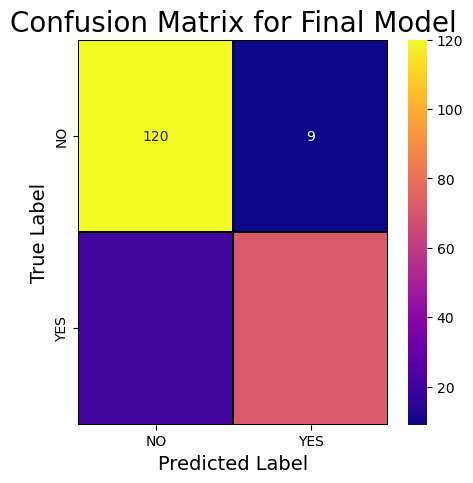

In [86]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14)
plt.ylabel("True Label",fontsize=14)
plt.title('Confusion Matrix for Final Model',fontsize=20)
plt.show()

### AOC ROC Curve of Final model

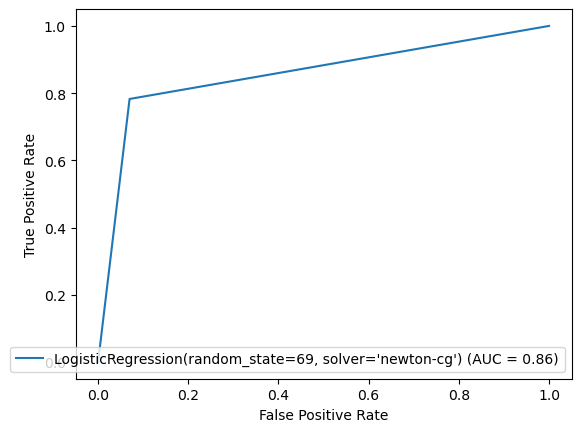

In [89]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_mod)
display.plot()

In [90]:
## Saving the model
import joblib
joblib.dump(Final_mod,"Titanic_Survival_Project.pkl")

['Titanic_Survival_Project.pkl']

## Predicting the Final Model 

In [91]:
# Prediction
prediction = Final_mod.predict(X_test)

In [94]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.sample(20)

,Predicted Values,Actual Values
102,0,0
16,1,1
190,0,0
48,1,1
71,1,1
37,1,1
193,0,0
96,1,1
211,0,0
66,0,0
